### 1. Interaction between monovacancy and various number of H atoms (Supplemental Material. SVII)
The trapping energy for the $ith$ H atom to a monovacancy is:
$$ E^{iH} = [E^{bk}_{Fe+H} - E^{bk}_{Fe}] - E^{Va}_{Fe+iH} - E^{Va}_{Fe+(i-1)H}] $$

<div style="text-align: center;">
    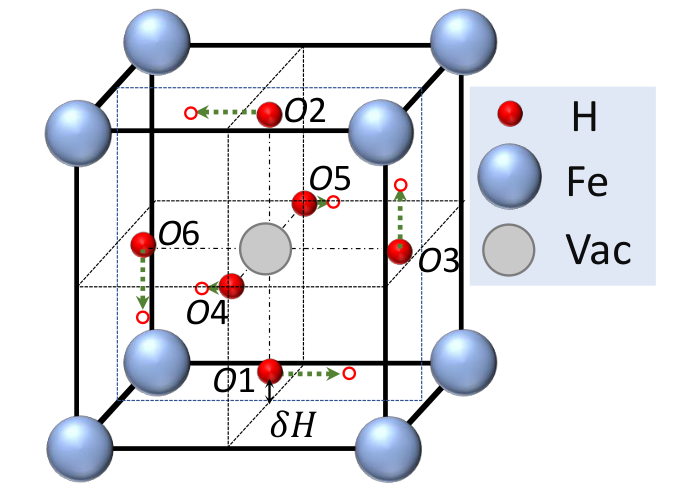
</div>


1.1 The trapping energy of a single H atom at monovacancy: $ E^{1H} = [E^{bk}_{Fe+H} - E^{bk}_{Fe}] - [E^{Va}_{Fe+1H} - E^{Va}_{Fe+0H}] $

E_Fe_H_T - E_Fe = -3.132357913019007\
E_Fe_H_O - E_Fe = -3.021180453103966

In [1]:
import pyiron
import matplotlib.pyplot as plt
import numpy as np

In [2]:
potential =  'FeH-NNIP'

In [3]:
pr = pyiron.Project('H-vacancy')

In [4]:
job = pr.create.job.Lammps('bulk', delete_existing_job=True)
bulk = pr.create.structure.bulk('Fe', cubic=True).repeat([3,3,3])
job.structure = bulk
job.potential = potential
job.calc_minimize(pressure=0.0)
job.server.cores = 4
job.run(delete_existing_job=True)

The job bulk was saved and received the ID: 10948


In [5]:
E_Fe = job.output.energy_tot[-1]
# bulk = job.get_structure(-1)
cell = bulk.get_cell()

In [6]:
bulk.plot3d()

NGLWidget()

In [7]:
bulk_H = bulk.copy()
H = pr.create.structure.atoms('H', positions=[(2.87/2, 0, 2.87/2)], cell=cell)
bulk_H += H
bulk_H.plot3d()

NGLWidget()

In [8]:
job = pr.create.job.Lammps('bulk_H', delete_existing_job=True)
job.structure = bulk_H
job.potential = potential
job.calc_minimize(pressure=0.0)
job.server.cores = 4
job.run(delete_existing_job=True)

E_Fe_H = job.output.energy_tot[-1]
E_Fe_H

The job bulk_H was saved and received the ID: 10949


-448.031707531181

In [9]:
-448.031707531181

-448.031707531181

In [10]:
job.animate_structures()

NGLWidget(max_frame=4)

In [11]:
bulk_vacancy = bulk.copy()
del bulk_vacancy[1]
bulk_vacancy.plot3d()

NGLWidget()

In [12]:
job = pr.create.job.Lammps('bulk_vacancy', delete_existing_job=True)
job.structure = bulk_vacancy
job.potential = potential
job.calc_minimize(pressure=0.0)
job.server.cores = 8
job.run(delete_existing_job=True)

E_vacancy = job.output.energy_tot[-1]
E_vacancy

The job bulk_vacancy was saved and received the ID: 10950


-434.574330474843

In [13]:
-434.574330474842

-434.574330474842

In [101]:
job.animate_structures()

NGLWidget(max_frame=4)

In [119]:
# bulk_vacancy_H = job.get_structure(-1).copy()
bulk_vacancy_H = bulk_vacancy.copy()
# bulk_vacancy_H.plot3d()

H = pr.create.structure.atoms('H', positions=[(2.87/2, 0, 2.87/2)], cell=cell)
bulk_vacancy_H += H
bulk_vacancy_H.plot3d()

NGLWidget()

In [120]:
job = pr.create.job.Lammps('bulk_vacancy_H', delete_existing_job=True)
job.structure = bulk_vacancy_H
job.potential = potential
job.calc_minimize(pressure=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
job.server.cores = 4
job.run(delete_existing_job=True)

E_vacancy_H = job.output.energy_tot[-1]
E_vacancy_H

The job bulk_vacancy_H was saved and received the ID: 10937


-438.310821465691

In [121]:
job.animate_structures()

NGLWidget(max_frame=4)

In [122]:
displacement = bulk_vacancy_H.get_positions()[-1] - job.get_structure(-1).get_positions()[-1]
displacement_y = displacement[1]
print('calculated displacement along y is:', -displacement_y, '\u212B')
print('the value in paper is: 0.244 \u212B')


calculated displacement along y is: 0.2491647151355375 Å
the value in paper is: 0.244 Å


In [123]:
E1 = (E_Fe_H - E_Fe) - (E_vacancy_H - E_vacancy)
E1

0.7383914074689528

0.592 in paper

2 vacancies: 
$$ E^{2H} = [E^{bk}_{Fe+H} - E^{bk}_{Fe}] - [E^{Va}_{Fe+2H} - E^{Va}_{Fe+1H}] $$

In [51]:
bulk_vacancy_2H = bulk_vacancy.copy()
# bulk_vacancy_2H.plot3d()
H = pr.create.structure.atoms(symbols=['H', 'H'], positions=[(2.87/2, 2.87+displacement_y, 2.87/2), (2.87/2, -displacement_y, 2.87/2)], cell=cell)
bulk_vacancy_2H+=H
bulk_vacancy_2H.plot3d()

NGLWidget()

In [52]:
job = pr.create.job.Lammps('bulk_vacancy_2H', delete_existing_job=True)
job.structure = bulk_vacancy_2H
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)

The job bulk_vacancy_2H was saved and received the ID: 10924


In [53]:
job.animate_structures()

NGLWidget(max_frame=3)

In [55]:
E_vacancy_2H = job.output.energy_tot[-1]
E2 = (E_Fe_H - E_Fe) - (E_vacancy_2H - E_vacancy_H)
E2

0.7807239355570346

0.612 in paper

3 vacancies: 
$$ E^{3H} = [E^{bk}_{Fe+H} - E^{bk}_{Fe}] - [E^{Va}_{Fe+3H} - E^{Va}_{Fe+2H}] $$

In [56]:
bulk_vacancy_3H = bulk_vacancy_2H.copy()
# bulk_vacancy_3H.plot3d()
H = pr.create.structure.atoms('H', positions=[(-displacement_y, 2.87/2, 2.87/2)], cell=cell)
bulk_vacancy_3H += H
bulk_vacancy_3H.plot3d()

NGLWidget()

In [57]:
job = pr.create.job.Lammps('bulk_vacancy_3H', delete_existing_job=True)
job.structure = bulk_vacancy_3H
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)

The job bulk_vacancy_3H was saved and received the ID: 10925


In [58]:
job.animate_structures()

NGLWidget(max_frame=5)

In [59]:
E_vacancy_3H = job.output.energy_tot[-1]
E3 = (E_Fe_H - E_Fe) - (E_vacancy_3H - E_vacancy_2H)
E3

0.5441055525000138

0.364 in paper

4 vacancies: 
$$ E^{4H} = [E^{bk}_{Fe+H} - E^{bk}_{Fe}] - [E^{Va}_{Fe+4H} - E^{Va}_{Fe+3H}] $$

O1-O4 configuration:

In [60]:
bulk_vacancy_4H_1 = bulk_vacancy_3H.copy()
# bulk_vacancy_4H_1.plot3d()
H = pr.create.structure.atoms('H', positions=[(2.87/2, 2.87/2, -displacement_y)], cell=cell)
bulk_vacancy_4H_1 += H
bulk_vacancy_4H_1.plot3d()

NGLWidget()

In [61]:
job = pr.create.job.Lammps('bulk_vacancy_4H_1', delete_existing_job=True)
job.structure = bulk_vacancy_4H_1
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)


The job bulk_vacancy_4H_1 was saved and received the ID: 10926


In [64]:
job.animate_structures()

NGLWidget(max_frame=9)

In [63]:
E_vacancy_4H_1 = job.output.energy_tot[-1]
E4 = (E_Fe_H - E_Fe) - (E_vacancy_4H_1 - E_vacancy_3H)
E4

0.53186436331697

0.286 in paper

O1, O2, O4, O5 configuration:

In [65]:
bulk_vacancy_4H_2 = bulk_vacancy_2H.copy()
bulk_vacancy_4H_2.plot3d()
H = pr.create.structure.atoms(symbols=['H','H'], positions=[(2.87/2, 2.87/2, -displacement_y), (2.87/2, 2.87/2, 2.87+displacement_y)], cell=cell)
bulk_vacancy_4H_2 += H
bulk_vacancy_4H_2.plot3d()

NGLWidget()

In [66]:
job = pr.create.job.Lammps('bulk_vacancy_4H_2', delete_existing_job=True)
job.structure = bulk_vacancy_4H_2
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)

The job bulk_vacancy_4H_2 was saved and received the ID: 10928


In [67]:
job.animate_structures()

NGLWidget(max_frame=6)

In [68]:
E_vacancy_4H_2 = job.output.energy_tot[-1]
E42 = (E_Fe_H - E_Fe) - (E_vacancy_4H_2 - E_vacancy_3H)
E42

0.4804802188909889

0.342 in paper

5 vacancies: 
$$ E^{5H} = [E^{bk}_{Fe+H} - E^{bk}_{Fe}] - [E^{Va}_{Fe+5H} - E^{Va}_{Fe+4H}] $$

In [69]:
bulk_vacancy_5H = bulk_vacancy_4H_1.copy()
bulk_vacancy_5H.plot3d()
H = pr.create.structure.atoms('H', positions=[(2.87/2, 2.87/2, 2.87+displacement_y)], cell=cell)
bulk_vacancy_5H += H
bulk_vacancy_5H.plot3d()

NGLWidget()

In [70]:
job = pr.create.job.Lammps('bulk_vacancy_5H', delete_existing_job=True)
job.structure = bulk_vacancy_5H
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)

The job bulk_vacancy_5H was saved and received the ID: 10929


In [71]:
job.animate_structures()

NGLWidget(max_frame=9)

In [72]:
E_vacancy_5H = job.output.energy_tot[-1]
E5 = (E_Fe_H - E_Fe) - (E_vacancy_5H - E_vacancy_4H_1)
E5

0.5251617371870339

6 vacancies: 
$$ E^{6H} = [E^{bk}_{Fe+H} - E^{bk}_{Fe}] - [E^{Va}_{Fe+6H} - E^{Va}_{Fe+5H}] $$

In [73]:
bulk_vacancy_6H = bulk_vacancy_5H.copy()
bulk_vacancy_6H.plot3d()
H = pr.create.structure.atoms('H', positions=[(2.87+displacement_y, 2.87/2, 2.87/2)], cell=cell)
bulk_vacancy_6H += H
bulk_vacancy_6H.plot3d()

NGLWidget()

In [74]:
job = pr.create.job.Lammps('bulk_vacancy_6H', delete_existing_job=True)
job.structure = bulk_vacancy_6H
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)

The job bulk_vacancy_6H was saved and received the ID: 10931


In [75]:
job.animate_structures()

NGLWidget(max_frame=6)

H repel, no motions as describe in the paper

In [76]:
E_vacancy_6H = job.output.energy_tot[-1]
E6 = (E_Fe_H - E_Fe) - (E_vacancy_6H - E_vacancy_5H)
E6

0.15480209000401146

0.046 in paper

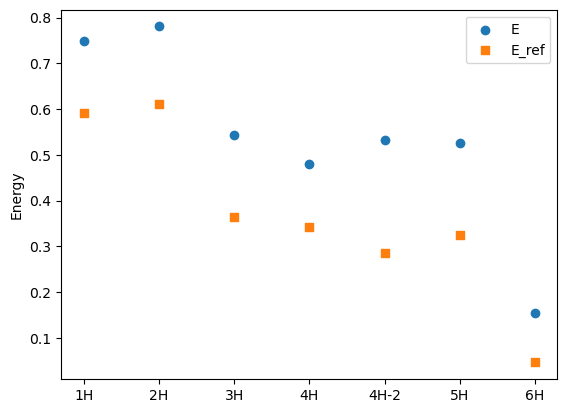

In [77]:
E = []
E.extend([E1, E2, E3, E42, E4, E5, E6])
E_ref = [0.592, 0.612, 0.364, 0.342, 0.286, 0.325, 0.046]

X = ['1H', '2H', '3H', '4H', '4H-2', '5H', '6H']

plt.scatter(X, E, label='E', marker='o')
plt.scatter(X, E_ref, label='E_ref', marker='s')

plt.ylabel('Energy')
plt.legend()

plt.show()

In paper, 4H configuration is more stable than 4H-2...I got the opposite results, but the energy difference is close

In [98]:
E4 - E42

0.05789868260097819

In [99]:
0.342 - 0.286

0.05600000000000005

### 2. diffusion of the H-vacancy complex (NEB)

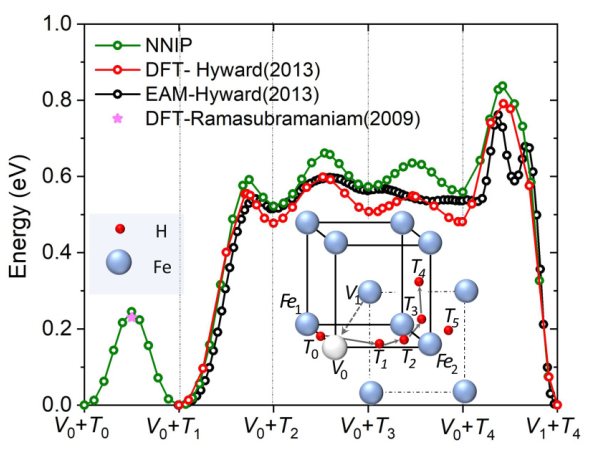
